<a href="https://colab.research.google.com/github/TheUnboundedSoul/TrabalhoDeIAA/blob/main/TrabalhoIAAv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

# Carregar CSV
uploaded = files.upload()

Saving medical_insurance.csv to medical_insurance.csv


Loading started at 1718810347.2162309, ended at 1718810347.2269754, took 0.010744571685791016 second(s)
Primeiras linhas do dataset:
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Cross-validation R^2 scores for LinearRegression: [0.75197533 0.76326918 0.68603062 0.67232158 0.77632918]
Average cross-validation R^2 score for LinearRegression: 0.7299851784159159
Cross-validation R^2 scores for Ridge: [0.75217868 0.76330067 0.68588106 0.67257802 0.77607116]
Average cross-validation R^2 score for Ridge: 0.7300019175373584
Cross-validation R^2 scores for Lasso: [0.75197708 0.76327237 0.68603065 0.67232641 0.77632801]
Average cross-validation R^2 score for Las

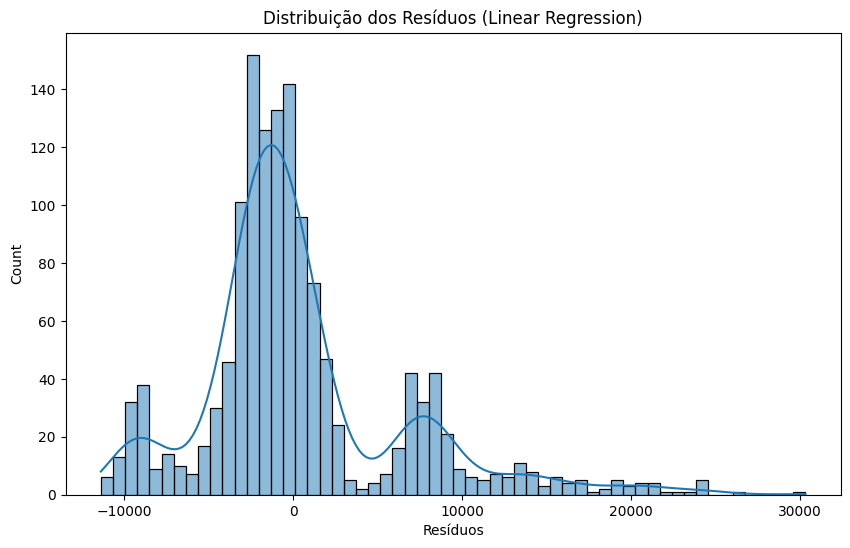

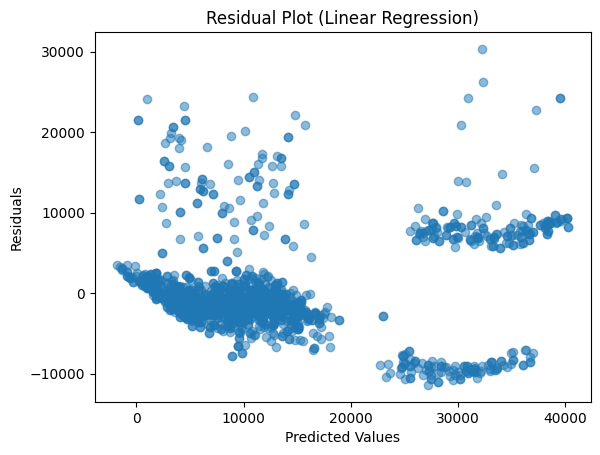

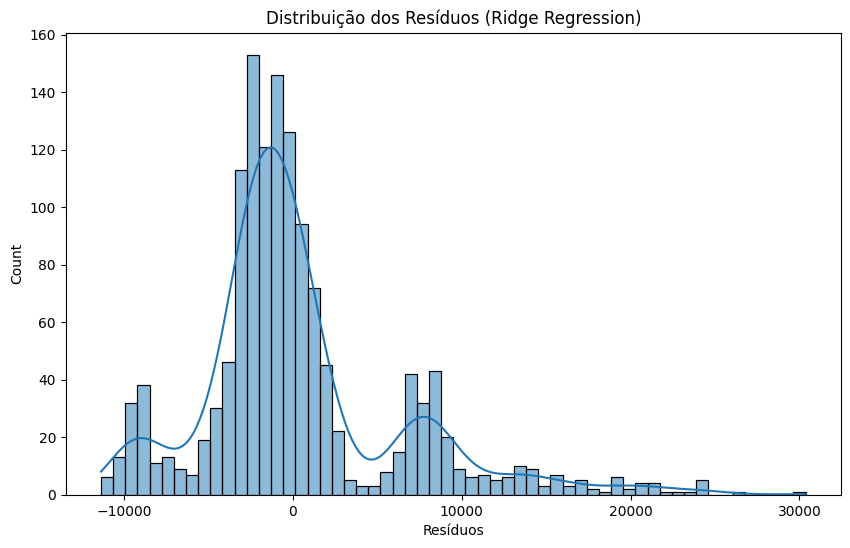

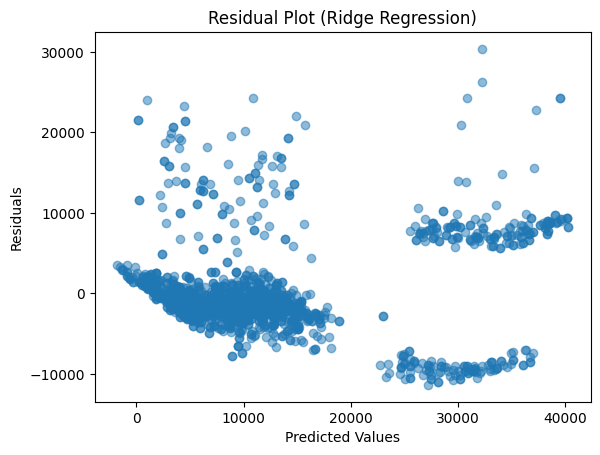

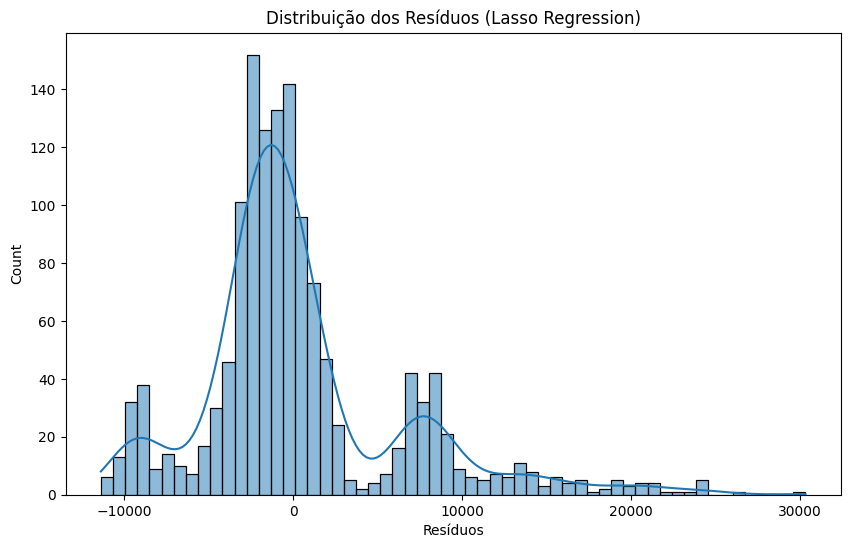

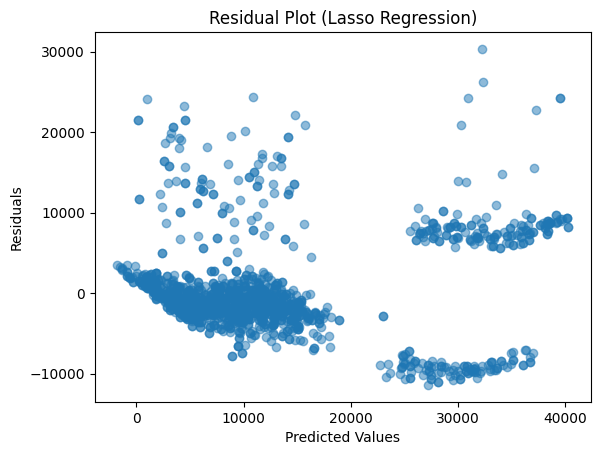

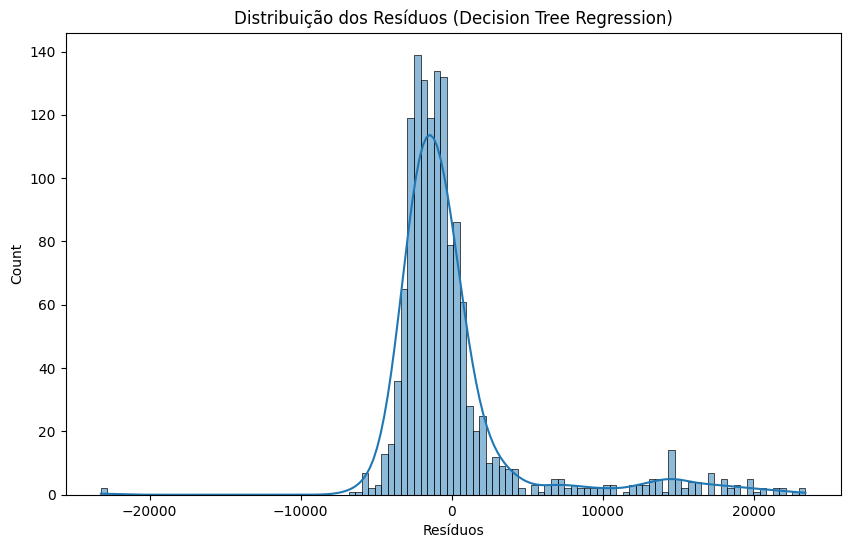

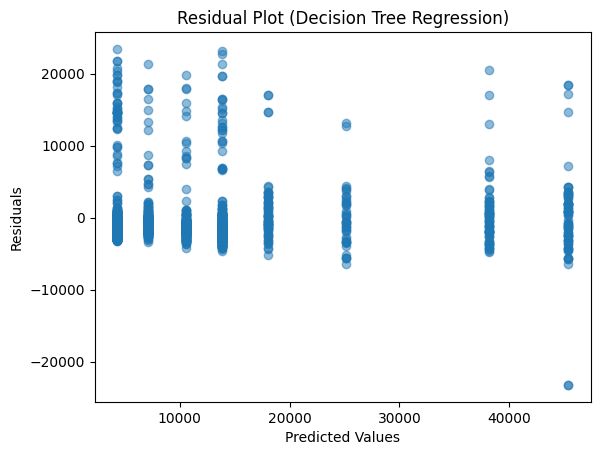

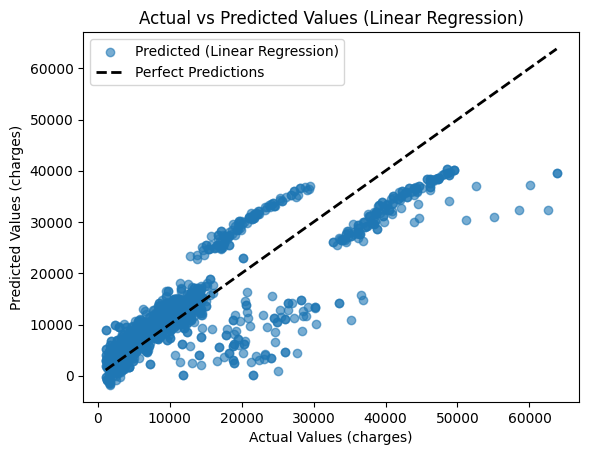

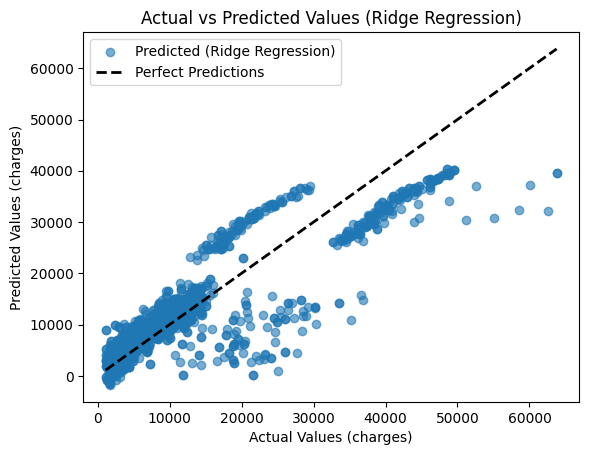

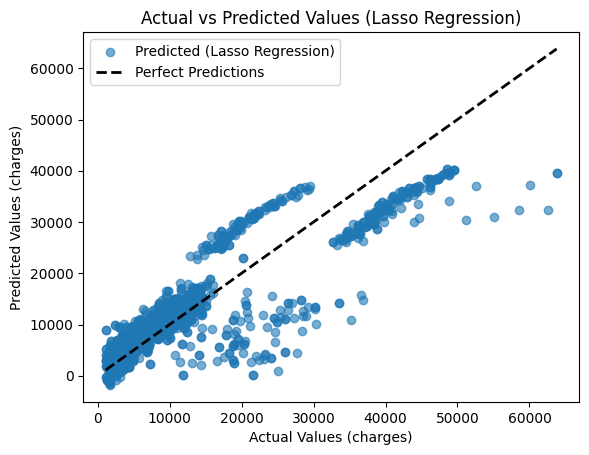

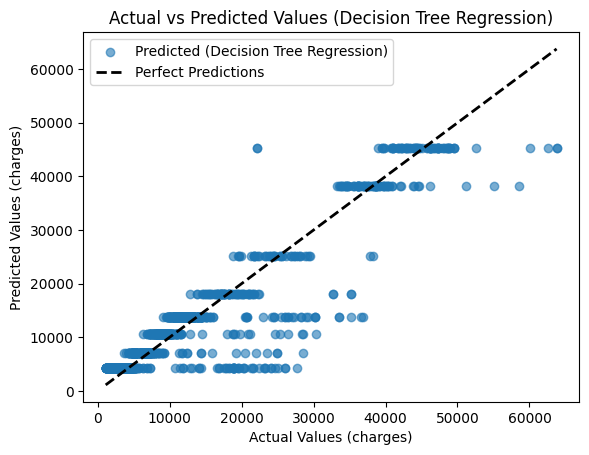

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


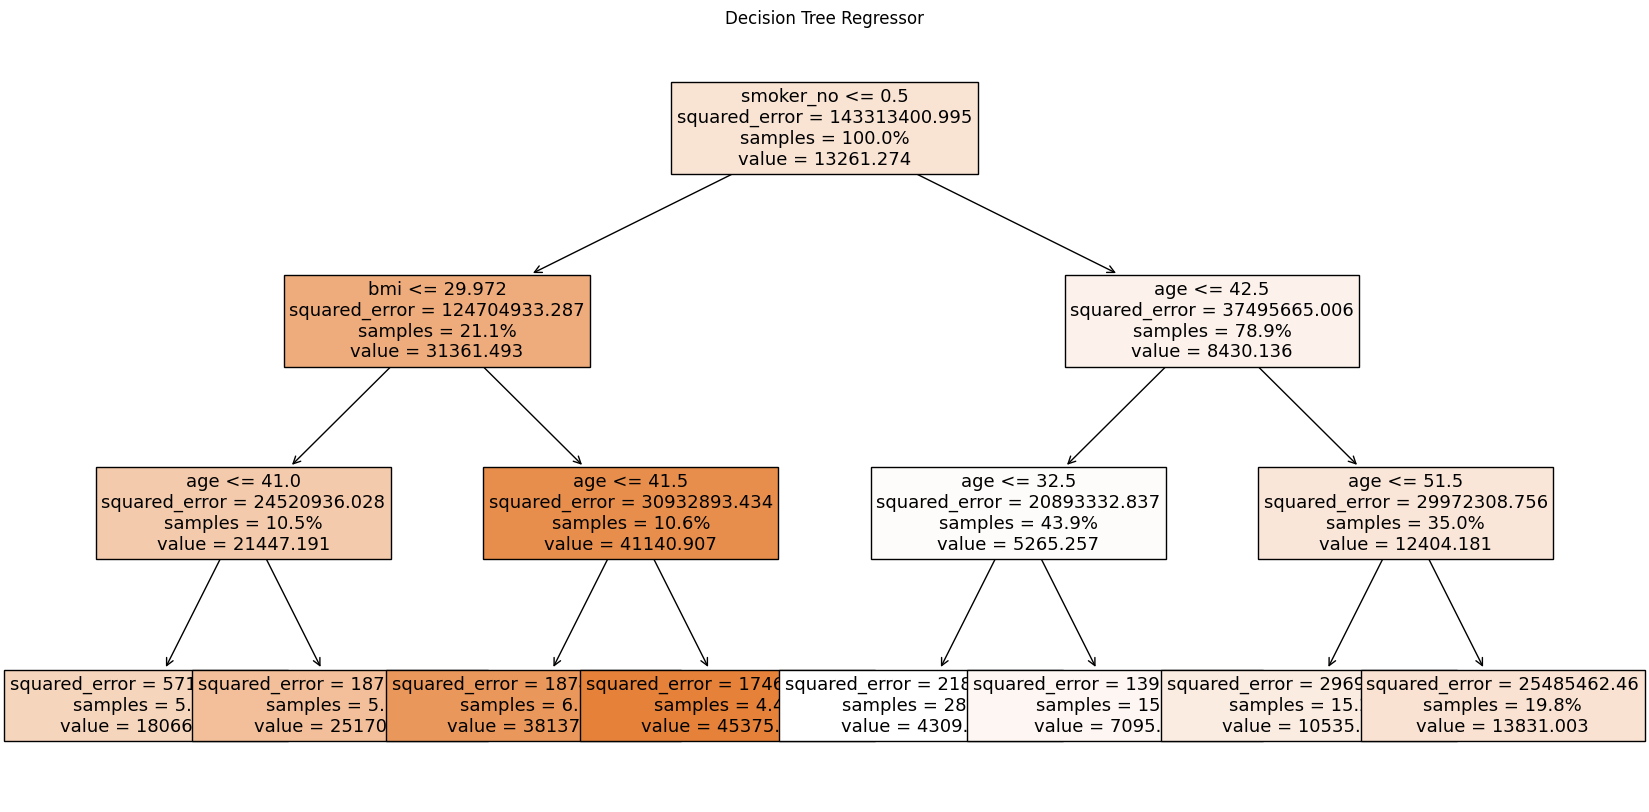

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import joblib
import seaborn as sns
import time
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from google.colab import drive

#-------------------------------------------------------------------
# 1 - Preparação dos Dados
#-------------------------------------------------------------------

# Registrar o tempo de início e término do carregamento dos dados
iTimeWhenLoadingStarted = time.time()
df = pd.read_csv('medical_insurance.csv')
iTimeWhenLoadingCompleted = time.time()
iSecondsTheLoadingTook = iTimeWhenLoadingCompleted - iTimeWhenLoadingStarted
strFormat = "Loading started at {}, ended at {}, took {} second(s)".format(iTimeWhenLoadingStarted, iTimeWhenLoadingCompleted, iSecondsTheLoadingTook)
print(strFormat)

# Verificar a estrutura dos dados
print("Primeiras linhas do dataset:\n", df.head())

# Convertendo variáveis categóricas em variáveis dummy (também conhecidas como variáveis indicadoras)
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])

# Dividir os dados em variáveis independentes (X) e variável dependente (y)
X = df.drop(columns=['charges'])
y = df['charges']

# Normalizar as variáveis independentes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

#-------------------------------------------------------------------
# 2 - Criação e Treinamento dos Modelos
#-------------------------------------------------------------------

# Regressão Linear Simples
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Regressão Ridge (com regularização)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Regressão Lasso (com regularização)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(max_depth=3)
dt_regressor.fit(X_train, y_train)

#-------------------------------------------------------------------
# 3 - Validação dos Modelos
#-------------------------------------------------------------------

# Avaliar modelos usando validação cruzada
#A validação cruzada é uma técnica para avaliar a capacidade de generalização de um modelo, a partir de um conjunto de dados.
def evaluate_model(model, X, y):
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f"Cross-validation R^2 scores for {model.__class__.__name__}:", cv_scores)
    print(f"Average cross-validation R^2 score for {model.__class__.__name__}:", np.mean(cv_scores))

evaluate_model(lr_model, X_train, y_train)
evaluate_model(ridge_model, X_train, y_train)
evaluate_model(lasso_model, X_train, y_train)
evaluate_model(dt_regressor, X_train, y_train)

#-------------------------------------------------------------------
# 4 - Avaliação dos Resultados
#-------------------------------------------------------------------

def print_evaluation_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model.__class__.__name__} - Erro quadrático médio (MSE): {mse}, Erro absoluto médio (MAE): {mae}, R^2 dos Resultados: {r2}")
    return y_pred

y_pred_lr = print_evaluation_metrics(lr_model, X_test, y_test)
y_pred_ridge = print_evaluation_metrics(ridge_model, X_test, y_test)
y_pred_lasso = print_evaluation_metrics(lasso_model, X_test, y_test)
y_pred_dt = print_evaluation_metrics(dt_regressor, X_test, y_test)

#-------------------------------------------------------------------
# 5 - Visualizações
#-------------------------------------------------------------------

def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.title(f"Distribuição dos Resíduos ({model_name})")
    plt.xlabel("Resíduos")
    plt.show()

    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residual Plot ({model_name})")
    plt.show()

plot_residuals(y_test, y_pred_lr, "Linear Regression")
plot_residuals(y_test, y_pred_ridge, "Ridge Regression")
plot_residuals(y_test, y_pred_lasso, "Lasso Regression")
plot_residuals(y_test, y_pred_dt, "Decision Tree Regression")

#-------------------------------------------------------------------
# 6 - Previsões e Comparação Visual
#-------------------------------------------------------------------

# Para a visualização, vamos plotar um gráfico de dispersão dos valores reais vs preditos
def plot_predictions(y_test, y_pred, model_name):
    plt.scatter(y_test, y_pred, alpha=0.6, label=f'Predicted ({model_name})')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Predictions')
    plt.xlabel("Actual Values (charges)")
    plt.ylabel("Predicted Values (charges)")
    plt.title(f"Actual vs Predicted Values ({model_name})")
    plt.legend()
    plt.show()

plot_predictions(y_test, y_pred_lr, "Linear Regression")
plot_predictions(y_test, y_pred_ridge, "Ridge Regression")
plot_predictions(y_test, y_pred_lasso, "Lasso Regression")
plot_predictions(y_test, y_pred_dt, "Decision Tree Regression")

#-------------------------------------------------------------------
# 7 - Salvando o Modelo
#-------------------------------------------------------------------

# Google Drive
drive.mount('/content/drive')

# Diretório para salvar os modelos
model_dir = '/content/drive/My Drive/Models/'

# Salvar os modelos treinados
joblib.dump(lr_model, model_dir + 'linear_regression_model.pkl')
joblib.dump(ridge_model, model_dir + 'ridge_regression_model.pkl')
joblib.dump(lasso_model, model_dir + 'lasso_regression_model.pkl')
joblib.dump(dt_regressor, model_dir + 'decision_tree_regressor_model.pkl')
joblib.dump(scaler, model_dir + 'scaler.pkl')

# 8 - Visualização da Árvore de Decisão
#-------------------------------------------------------------------

plt.figure(figsize=(20,10))
tree.plot_tree(dt_regressor, feature_names=X.columns, filled=True, fontsize=13, proportion=True)
plt.title("Decision Tree Regressor")
plt.show()

#-------------------------------------------------------------------
# Discussão e Comparação
#-------------------------------------------------------------------

# Explicação Teórica
# Regressão Linear é um modelo simples e interpretável, mas pode ser limitado por outliers e não captura relações não lineares.
# Regressão Ridge e Lasso adicionam regularização para evitar overfitting, com Ridge penalizando grandes coeficientes e Lasso podendo zerar alguns coeficientes.
# Decision Tree Regressor captura relações não lineares e interações entre características, mas pode ser propenso a overfitting se não for bem podado.

# Discussão dos Resultados
# Comparando as métricas (MSE, MAE, R2), podemos ver como cada modelo performa e qual é mais adequado para o nosso conjunto de dados.
# Visualizações como gráficos de resíduos e comparações de valores reais vs preditos ajudam a entender melhor a performance de cada modelo.

# Sugestões de Melhoria
# Poderíamos experimentar outros modelos como Random Forest, Gradient Boosting, ou mesmo redes neurais.
# Outras técnicas de feature engineering e seleção de características poderiam ser exploradas para melhorar a performance do modelo.

# Auto-descoberta
# Exploramos técnicas básicas de modelagem, mas há muitas outras técnicas avançadas que poderiam ser exploradas, como ensemble methods, tuning de hiperparâmetros mais aprofundado, e validação cruzada mais robusta.
